# Day 18: Many-Worlds Interpretation

https://adventofcode.com/2019/day/18

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

In [274]:
WALL  = 1
EMPTY = 0
DOOR  = 2
KEY   = EMPTY
VISITED = 3
START   = VISITED

def amaze2matrix(amaze):
    nrow = len(amaze)
    ncol = len(amaze[0])
    shape = (nrow,ncol)
    maze = np.zeros(shape)
    x0 = np.zeros(2)    
    doors = {}
    keys = {}
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if c=='#':
                maze[j][i] = WALL
            elif c=='.':
                maze[j][i] = EMPTY
            elif c=='@':
                maze[j][i] = START
                start = (i,j) 
            else:
                if c.isupper():
                    maze[j][i] = DOOR
                    doors[c] = (i,j)
                else:
                    maze[j][i] = KEY
                    keys[c] = (i,j)
            i+=1
        j+=1
    return maze, doors, keys, start

## Coordinates for a given position are encoded as (x,y) tuple
def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def BFS(start, end, theMaze, ignoreDoors=True):
    '''Find shorter path between two position in the maze using BFS algorithm'''
    maze = np.copy(theMaze)
    queue = Queue()
    queue.put([start]) # wrap the starting cell tuple in a list
    lenmax = 1
    while not queue.empty():
        path = queue.get() # get a path form the paths' queur
        c = path[-1] # take last step of current path
        if c == end:
            return path
        for a in getAdjacent(c): # explore adjacent cells
            x,y = a
            if maze[y][x] == WALL or maze[y][x] == VISITED \
                or ( not ignoreDoors and maze[y][x] == DOOR) : 
                # if a dead is reached (all WALL or VISITED) path gets dequeued
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path) # store back the path in the queue with the new step
    #print("END position not reachable")
    return []

In [275]:
#inputfile = "./data/day18test1.txt"
inputfile = "./data/input18.txt"

with open(inputfile) as f:
    amaze = [l.rstrip('\n') for l in f]

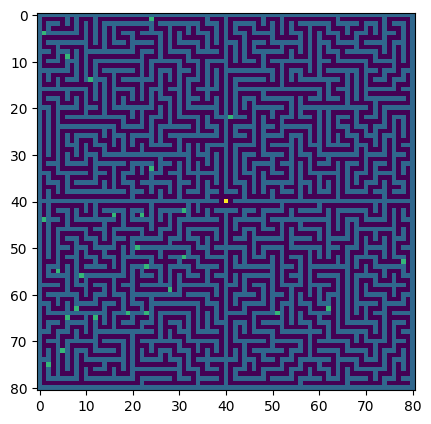

In [276]:
maze, doors, keys, start = amaze2matrix(amaze)

fig = plt.figure(figsize=(5,5), dpi=100)
plt.imshow(maze)

In [277]:
def reachableKeys(pos,keys,theMaze):
    maze = np.copy(theMaze)
    # check distance of reachable keys from current position
    reachable = {}
    for k in keys.keys():
        end = keys[k]
        path = BFS(pos,end,maze,ignoreDoors=False)
        if len(path): # Key is reachable
            reachable[k] = end
    return reachable

In [278]:
pos = start
reachableKeys(pos,keys,maze)

{'s': (69, 27), 'c': (67, 41), 'q': (41, 45), 'm': (29, 65), 'z': (35, 67)}

In [279]:
def shortestPath(start,end,maze,doors):
    path = BFS(start,end,maze,ignoreDoors=True)
    doorsOnPath = []
    for c in path:
        if c in doors.values():
            doorsOnPath.append(list(doors.keys())[list(doors.values()).index(c)])
    return path, doorsOnPath

In [280]:
start = keys['s']
end = keys['t']
path, doorsOnPath = shortestPath(start,end,maze,doors)
len(path), doorsOnPath

(339, ['A'])

In [ ]:
pos = start

for k in reachableKeys(pos,keys,maze):
    end = keys[k]
    path = BFS(pos,end,maze,ignoreDoors=False)

